In [161]:
import pandas as pd
import geopandas as gpd
import requests
from statistics import stdev
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [162]:
# Component: Find statistics of a numerical column and where they are located
# (mean, median, max, min, range, standard deviation) 

In [163]:
#Get Census data from API
HOST = 'https://api.census.gov/data'
year = '2016'
dataset = 'ase/cscb'

base_url = '/'.join([HOST, year, dataset])

predicates = {}

get_vars = ['NAME', 'NAICS2012_LABEL', 'ASECB', 'ASECB_LABEL', 'SPOUSES,SPOUSES_LABEL', 'YEAR',
            'FIRMPDEMP', 'FIRMPDEMP_PCT', 'RCPPDEMP', 'RCPPDEMP_F', 'RCPPDEMP_PCT', 'EMP', 'EMP_PCT', 
            'PAYANN', 'PAYANN_PCT', 'FIRMPDEMP_S', 'FIRMPDEMP_PCT_S', 'RCPPDEMP_S', 'RCPPDEMP_PCT_S',
            'EMP_S', 'EMP_PCT_S', 'PAYANN_S', 'PAYANN_PCT_S']

predicates['get'] = ','.join(get_vars)

predicates['for'] = 'state:*'

r = requests.get(base_url, params= predicates)



In [164]:
df = pd.DataFrame(columns=r.json()[0], data=r.json()[1:])

In [165]:
#Convert data to correct type
to_int = ['ASECB', 'YEAR', 'FIRMPDEMP', 'RCPPDEMP', 'EMP', 'PAYANN', 'state']

to_float = ['FIRMPDEMP_PCT', 'RCPPDEMP_PCT', 'EMP_PCT', 'PAYANN_PCT', 
            'FIRMPDEMP_S', 'FIRMPDEMP_PCT_S', 'RCPPDEMP_S', 'RCPPDEMP_PCT_S', 
            'EMP_S', 'EMP_PCT_S', 'PAYANN_S', 'PAYANN_PCT_S',]

for column in to_int:
  df[column] = df[column].astype(int)

for column in to_float:
  df[column] = df[column].astype(float)

In [166]:
df.head()

,NAME,NAICS2012_LABEL,ASECB,ASECB_LABEL,SPOUSES,SPOUSES_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_PCT,RCPPDEMP,...,PAYANN_PCT,FIRMPDEMP_S,FIRMPDEMP_PCT_S,RCPPDEMP_S,RCPPDEMP_PCT_S,EMP_S,EMP_PCT_S,PAYANN_S,PAYANN_PCT_S,state
0,Alabama,Total for all sectors,0,All firms,A1,All firms,2016,67328,0.0,0,...,0.0,0.5,0.0,0.0,0.0,3.8,0.0,3.1,0.0,1
1,Alabama,Total for all sectors,0,All firms,LZ,Jointly owned and equally operated by spouses,2016,3212,8.2,0,...,4.5,5.9,0.4,0.0,0.0,9.3,1.5,9.6,0.9,1
2,Alabama,Total for all sectors,0,All firms,MA,Jointly owned but primarily operated by male s...,2016,2822,7.2,0,...,5.2,8.3,0.6,0.0,0.0,14.8,1.3,14.8,1.0,1
3,Alabama,Total for all sectors,0,All firms,MB,Jointly owned but primarily operated by female...,2016,1094,2.8,0,...,5.2,12.7,0.4,0.0,0.0,43.6,3.4,60.4,4.1,1
4,Alabama,Total for all sectors,0,All firms,MC,Not jointly owned by spouses,2016,31852,81.7,0,...,85.1,1.5,0.8,0.0,0.0,5.7,4.7,6.2,4.1,1


In [167]:
print("Overall Statistics Across All States")
df.describe()

Overall Statistics Across All States


,ASECB,YEAR,FIRMPDEMP,FIRMPDEMP_PCT,RCPPDEMP,RCPPDEMP_PCT,EMP,EMP_PCT,PAYANN,PAYANN_PCT,FIRMPDEMP_S,FIRMPDEMP_PCT_S,RCPPDEMP_S,RCPPDEMP_PCT_S,EMP_S,EMP_PCT_S,PAYANN_S,PAYANN_PCT_S,state
count,408.0,408.0,408.000000,408.000000,408.0,408.0,4.080000e+02,408.000000,4.080000e+02,408.000000,408.000000,408.000000,408.0,408.0,408.000000,408.000000,408.000000,408.000000,408.000000
mean,0.0,2016.0,31626.426471,25.000980,0.0,0.0,5.382940e+05,24.879412,2.611874e+07,24.902696,9.721078,0.365686,0.0,0.0,11.980147,1.378186,12.680147,1.262010,28.960784
std,0.0,0.0,69387.945851,37.147589,0.0,0.0,1.256532e+06,37.666467,6.783843e+07,38.469057,13.890063,0.483028,0.0,0.0,12.976540,2.042134,12.235190,1.929393,15.696083
min,0.0,2016.0,4.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.100000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,2016.0,1257.250000,0.000000,0.0,0.0,1.610500e+04,0.000000,5.025648e+05,0.000000,1.500000,0.000000,0.0,0.0,3.800000,0.000000,4.275000,0.000000,16.000000
50%,0.0,2016.0,5609.000000,4.550000,0.0,0.0,9.762850e+04,4.150000,3.716408e+06,2.800000,5.600000,0.050000,0.0,0.0,7.800000,0.000000,8.900000,0.000000,29.000000
75%,0.0,2016.0,30403.000000,29.100000,0.0,0.0,5.311488e+05,28.675000,2.283864e+07,30.000000,11.325000,0.600000,0.0,0.0,15.100000,2.200000,16.725000,2.100000,42.000000
max,0.0,2016.0,712691.000000,100.000000,0.0,0.0,1.414628e+07,100.000000,8.413244e+08,100.000000,98.600000,2.500000,0.0,0.0,83.200000,13.100000,72.800000,11.900000,56.000000


In [168]:
#Load state map
state_map = gpd.read_file("cb_2018_us_state_500k")
state_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [169]:
#Split into east and west to view more clearly
continental_states = ['WA', 'OR', 'CA', 'ID', 'NV', 'AZ', 'UT', 'WY', 'MT', 'CO', 'NM', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX',
                         'MN', 'IA', 'MO', 'AR', 'LA', 'WI', 'IL', 'MS', 'MI', 'IN', 'KY', 'TN', 'AL', 'OH', 'GA', 'FL',
                        'NY', 'PA', 'WV', 'VA', 'NC', 'SC', 'ME', 'NH', 'VT', 'MA', 'CT', 'RI','MD', 'NJ', 'DE']

west = ['WA', 'OR', 'CA', 'ID', 'NV', 'AZ', 'UT', 'WY', 'MT', 'CO', 'NM', 'ND', 'SD', 'NE', 'KS', 'OK', 'TX']

east = ['MN', 'IA', 'MO', 'AR', 'LA', 'WI', 'IL', 'MS', 'MI', 'IN', 'KY', 'TN', 'AL', 'OH', 'GA', 'FL',
        'NY', 'PA', 'WV', 'VA', 'NC', 'SC', 'ME', 'NH', 'VT', 'MA', 'CT', 'RI','MD', 'NJ', 'DE']

In [170]:
continental_map = states[states['STUSPS'].isin(continental_states)]

In [171]:
#Get column name and calculate data for each state
column_name = 'PAYANN'
state_min = []
state_max = []
state_range = []
state_mean = []
state_sd = []

for state in continental_map['NAME']:
    data = df[df['NAME'] == state.strip()]
    column = data[column_name]
    
    state_min.append(column.min())
    state_max.append(column.max())
    state_range.append(max_val - min_val)
    state_mean.append(round(column.mean(), 2))
    state_sd.append(round(stdev(column), 2))


In [172]:
continental_map['Min'] = state_min
continental_map['Max'] = state_max
continental_map['Range'] = state_range
continental_map['Mean'] = state_mean
continental_map['SD'] = state_sd

continental_map.head()

<ipython-input-172-3b70024608c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continental_map['Min'] = state_min
<ipython-input-172-3b70024608c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continental_map['Max'] = state_max
<ipython-input-172-3b70024608c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Min,Max,Range,Mean,SD
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",170287,29588817,89853259,6731908.88,9917219.63
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",144532,161946749,89853259,35931362.25,54242229.72
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",54701,58480483,89853259,13658280.00,19595452.19
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0,160455089,89853259,37063150.12,53972343.69
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0,21517907,89853259,4620639.88,7218888.57


<ipython-input-173-048245b385a4>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


(-130.0, -66.0)

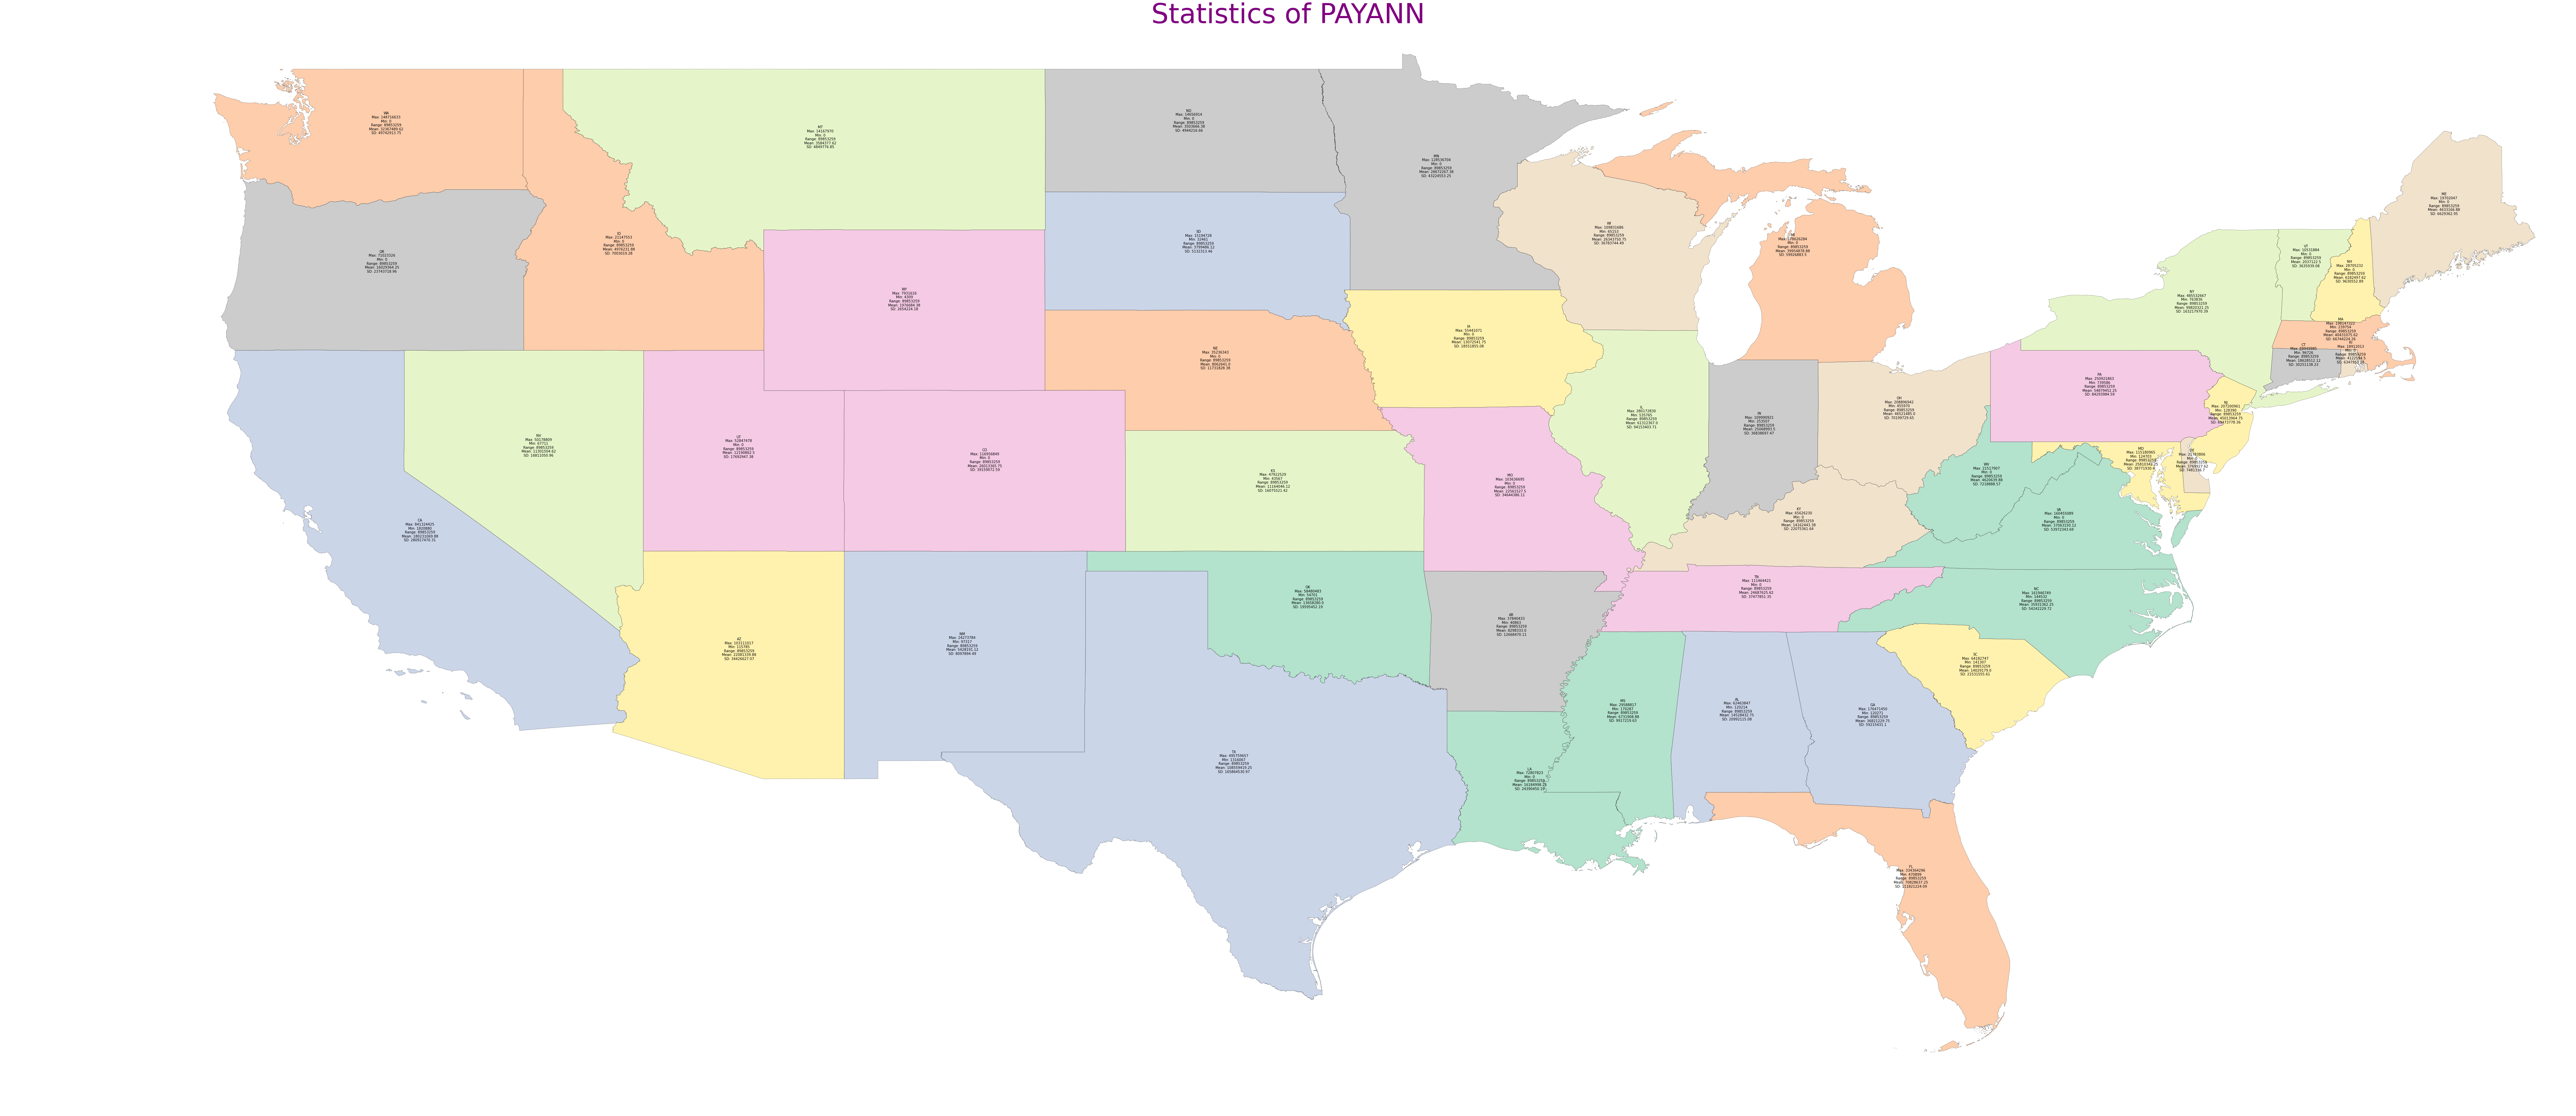

In [173]:
#Show continental map
fig = plt.figure(1, figsize=(135,135)) 
plt.title('Statistics of ' + column_name, fontsize=80, color ='purple')
ax = fig.add_subplot()

#Add text
continental_map.apply(lambda x: ax.annotate(text=x.STUSPS + '\n' + 'Max: ' + str(x.Max) + '\n' + 'Min: ' + str(x.Min) + '\n' + 
                                            'Range: ' + str(x.Range) + '\n' + 'Mean: ' + str(x.Mean) + '\n' + 'SD: ' + str(x.SD),
                                            xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);

continental_map.boundary.plot(ax=ax, color='Black', linewidth=.3)
continental_map.plot(ax=ax, cmap='Pastel2', figsize=(40,15))
plt.axis('off')
plt.ylim((23,50))
plt.xlim((-130,-66))
